# Data Analysis for salary prediction

Dataset used: [Salary Prediction (Kaggle)](https://www.kaggle.com/datasets/thedevastator/jobs-dataset-from-glassdoor)

In [1]:
import pandas as pd
import numpy as np

In [2]:
org_df = pd.read_csv("dataset/salary_data_cleaned.csv")
print(org_df.shape)
org_df.head()

(742, 28)


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [3]:
df = org_df[["Rating", "hourly", "employer_provided",
             "same_state", "age", "python_yn", "R_yn", "spark", "aws", "excel", "avg_salary"]]
df.apply(lambda x: np.float32(x))
df.head()

,Rating,hourly,employer_provided,same_state,age,python_yn,R_yn,spark,aws,excel,avg_salary
0,3.8,0,0,0,47,1,0,0,0,1,72.0
1,3.4,0,0,0,36,1,0,0,0,0,87.5
2,4.8,0,0,1,10,1,0,1,0,1,85.0
3,3.8,0,0,1,55,1,0,0,0,0,76.5
4,2.9,0,0,1,22,1,0,0,0,1,114.5


In [4]:
neg_rows = set()
for col in df:
    for i, val in enumerate(df[col]):
        if val<0: neg_rows.add(i)
        
df = df.drop(index=list(neg_rows))
df = df.reset_index(drop=True)
print(df.shape)
df.head()

(690, 11)


,Rating,hourly,employer_provided,same_state,age,python_yn,R_yn,spark,aws,excel,avg_salary
0,3.8,0,0,0,47,1,0,0,0,1,72.0
1,3.4,0,0,0,36,1,0,0,0,0,87.5
2,4.8,0,0,1,10,1,0,1,0,1,85.0
3,3.8,0,0,1,55,1,0,0,0,0,76.5
4,2.9,0,0,1,22,1,0,0,0,1,114.5


## Exploratory Data Analysis

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### How many people have each of the skills

{'python_yn': 372, 'R_yn': 2, 'spark': 160, 'aws': 161, 'excel': 357}


e:\Documents\Chaitanya\Git Repositories\Data-Scientist-Salary-Prediction\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Documents\Chaitanya\Git Repositories\Data-Scientist-Salary-Prediction\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Documents\Chaitanya\Git Repositories\Data-Scientist-Salary-Prediction\.venv\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
e:\Documents\Chaitanya\Git Repositories\Data-Scientist-Salary-Prediction\.venv\L

<Axes: >

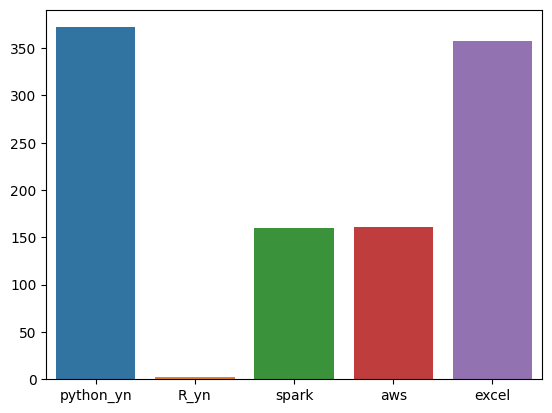

In [6]:
count = {x: df[x].sum() for x in ["python_yn", "R_yn", "spark", "aws", "excel"]}
print(count)

sns.barplot(x=list(count.keys()), y=list(count.values()))

#### Inference

R is the least known skill among data scientists, while python and excel is most common one.

### How each skill affects salary distribution

e:\Documents\Chaitanya\Git Repositories\Data-Scientist-Salary-Prediction\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Documents\Chaitanya\Git Repositories\Data-Scientist-Salary-Prediction\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Documents\Chaitanya\Git Repositories\Data-Scientist-Salary-Prediction\.venv\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
e:\Documents\Chaitanya\Git Repositories\Data-Scientist-Salary-Prediction\.venv\L

<Axes: >

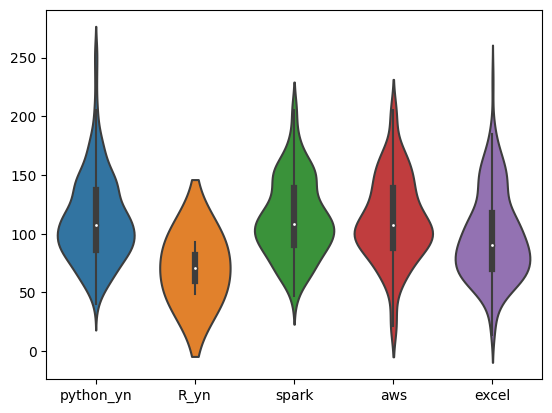

In [7]:
skill = []
salary = []

for s in ["python_yn", "R_yn", "spark", "aws", "excel"]:
    for i, val in enumerate(df[s]):
        if val==0: continue
        elif val==1:
            skill.append(s)
            salary.append(df["avg_salary"][i])
        else: raise Exception("Value other than 0 and 1!")

sns.violinplot(y=salary, x=skill)

#### Inferences

1. Python, AWS and Spark knowing professionals have similar salaries.

2. R is not that valued in data science job market.

### Age and salary distribution

e:\Documents\Chaitanya\Git Repositories\Data-Scientist-Salary-Prediction\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Documents\Chaitanya\Git Repositories\Data-Scientist-Salary-Prediction\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

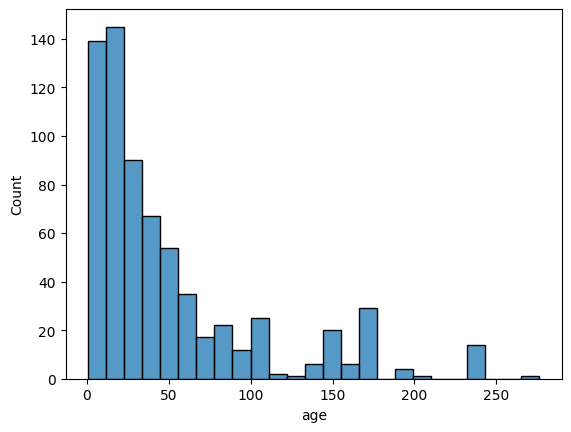

In [8]:
sns.histplot(df, x="age")

#### Inference

Age data is highly flawed, hence we will not use this for training.

e:\Documents\Chaitanya\Git Repositories\Data-Scientist-Salary-Prediction\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Documents\Chaitanya\Git Repositories\Data-Scientist-Salary-Prediction\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='avg_salary', ylabel='Count'>

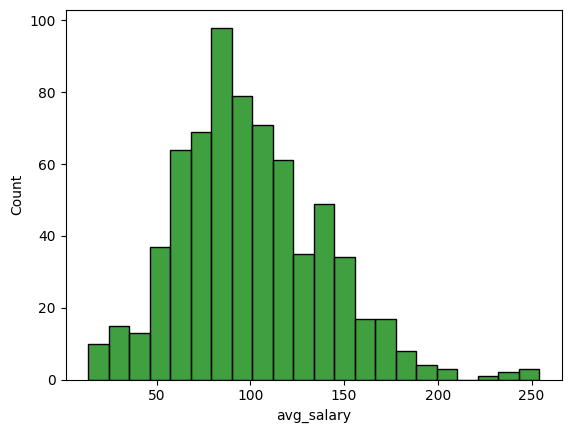

In [9]:
sns.histplot(df, x="avg_salary", color="green")

#### Inferences

1. Salary is normally distributed.

2. Salaries of data scientists is mostly between 60K and 120K.

### How many people do job in same state and does it have any effect on their salary?

e:\Documents\Chaitanya\Git Repositories\Data-Scientist-Salary-Prediction\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Documents\Chaitanya\Git Repositories\Data-Scientist-Salary-Prediction\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Documents\Chaitanya\Git Repositories\Data-Scientist-Salary-Prediction\.venv\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
e:\Documents\Chaitanya\Git Repositories\Data-Scientist-Salary-Prediction\.venv\L

(array([0, 1]), [Text(0, 0, 'Not same state'), Text(0, 1, 'Same state')])

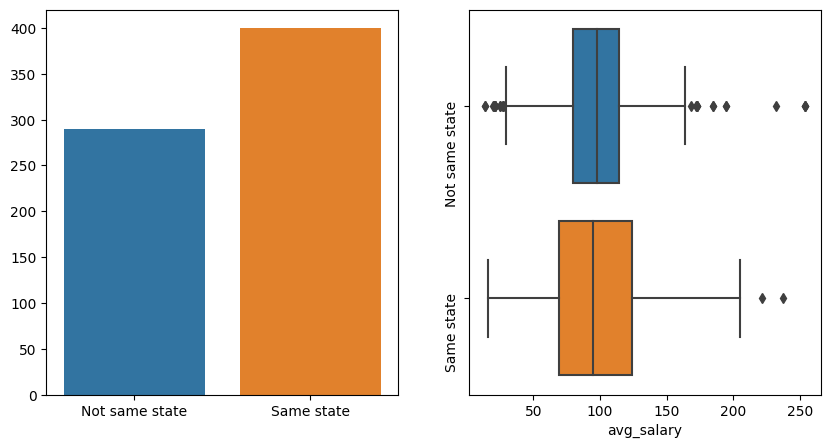

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(x=["Not same state", "Same state"],
            y=[(df.same_state==x).sum() for x in (0,1)],
            ax=ax[0])

x = sns.boxplot(x=df["avg_salary"],
            y=["Same state" if x==1 else "Not same state" for x in df.same_state],
            ax=ax[1])

plt.yticks(rotation=90)

### Rating distribution

e:\Documents\Chaitanya\Git Repositories\Data-Scientist-Salary-Prediction\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Documents\Chaitanya\Git Repositories\Data-Scientist-Salary-Prediction\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rating', ylabel='Count'>

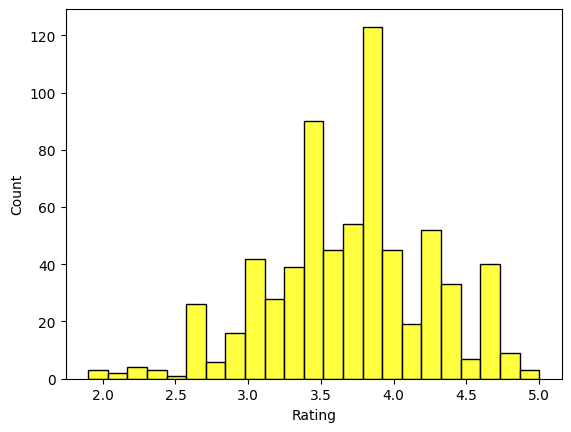

In [11]:
sns.histplot(df, x="Rating", color="yellow")

### Is hourly pay higher or lower?

e:\Documents\Chaitanya\Git Repositories\Data-Scientist-Salary-Prediction\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Documents\Chaitanya\Git Repositories\Data-Scientist-Salary-Prediction\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Documents\Chaitanya\Git Repositories\Data-Scientist-Salary-Prediction\.venv\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
e:\Documents\Chaitanya\Git Repositories\Data-Scientist-Salary-Prediction\.venv\L

<Axes: xlabel='avg_salary'>

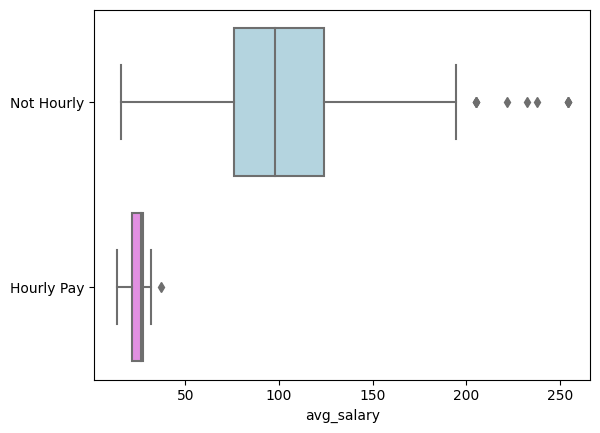

In [12]:
sns.boxplot(x=df["avg_salary"],
            y=["Hourly Pay" if x==1 else "Not Hourly" for x in df.hourly],
            palette=["lightblue", "violet"])

Hourly pay is much lower for a data scientist

## Data cleaning and transformation

In [13]:
df = org_df[["Rating", "hourly", "same_state", "python_yn", "R_yn", "spark", "aws", "excel", "avg_salary"]]
df.apply(lambda x: np.float32(x))

,Rating,hourly,same_state,python_yn,R_yn,spark,aws,excel,avg_salary
0,3.8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,72.0
1,3.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,87.5
2,4.8,0.0,1.0,1.0,0.0,1.0,0.0,1.0,85.0
3,3.8,0.0,1.0,1.0,0.0,0.0,0.0,0.0,76.5
4,2.9,0.0,1.0,1.0,0.0,0.0,0.0,1.0,114.5
...,...,...,...,...,...,...,...,...,...
737,3.9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,84.5
738,4.4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,102.5
739,2.6,0.0,1.0,0.0,0.0,0.0,0.0,1.0,73.5
740,3.2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,127.5


In [14]:
neg_rows = set()
for col in df:
    for i, val in enumerate(df[col]):
        if val<0: neg_rows.add(i)
        
df = df.drop(index=list(neg_rows))
df = df.dropna()
df = df.reset_index(drop=True)

print(df.shape)
df.head()

(731, 9)


,Rating,hourly,same_state,python_yn,R_yn,spark,aws,excel,avg_salary
0,3.8,0,0,1,0,0,0,1,72.0
1,3.4,0,0,1,0,0,0,0,87.5
2,4.8,0,1,1,0,1,0,1,85.0
3,3.8,0,1,1,0,0,0,0,76.5
4,2.9,0,1,1,0,0,0,1,114.5


In [15]:
df_arr = df.to_numpy()

print("Features shape:", df_arr[:,:-1].shape)
print("Targets shape:", df_arr[:,-1].shape)

Features shape: (731, 8)
Targets shape: (731,)
